In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

%matplotlib inline

seed = 14
rng = np.random.default_rng(seed)

**Урок 2.**<br>
**Задание 1:** Модифицировать реализацию линейной регрессии из предыдущего урока, добавив l2 регулярязационную поправку к штрафной функции: +𝑐∗∑(𝑤_j)^2 и соответствующую к выражению для производной. Опробовать реализацию на примере с полиномиальными фичами 6го порядка из данного урока. При каком значении С в воспроизводимой функции не будет воспроизводить несуществующий минимум в окрестностях x=7,5?

In [9]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = rng.normal(size=(n_features, ))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = rng.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true) + rng.normal(0, 0.5, size=(n_objects))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

# единичная матрица для формулы с регуляризацией L2
E = np.eye(X.shape[1], dtype=int)

In [10]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror_L2(X, w, y_pred, l2_coef=0.1):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y) + l2_coef * w.dot(w.T)  # + c*||w||^2 для регуляризационной поправки

def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [11]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e7

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-9

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# Коэффициент L2 регуляризации
l2_coef = 0.1

In [22]:
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - eta * (2 * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0] - l2_coef * 2 * w)  # L2 реугляризация
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    cur_error = mserror_L2(X, new_w, Y, l2_coef)
    errors.append(cur_error)
    print(f'Current error: {cur_error}')

    iter_num += 1
    w = new_w
    print(f'Значение w: {w}')
    
w_list = np.array(w_list)

#print(X.shape, w.shape)
#print(w)

Current error: 0.5707295557575058
Значение w: [0.06787121]
Current error: 0.39538012700565806
Значение w: [0.11381863]
Current error: 0.3158617179570762
Значение w: [0.14492409]
Current error: 0.2799900122085496
Значение w: [0.16598186]
Current error: 0.26393698196360105
Значение w: [0.18023753]
Current error: 0.256841861566499
Значение w: [0.18988833]
Current error: 0.253767530262668
Значение w: [0.19642173]
Current error: 0.2524786372157245
Значение w: [0.2008447]
Current error: 0.2519692255403395
Значение w: [0.20383897]
Current error: 0.25179079296985685
Значение w: [0.20586602]
Current error: 0.2517462722699764
Значение w: [0.2072383]
Current error: 0.2517510893718546
Значение w: [0.2081673]
Current error: 0.2517703711558144
Значение w: [0.20879621]
Current error: 0.25179076683946555
Значение w: [0.20922198]
Current error: 0.25180793929080003
Значение w: [0.20951021]
Current error: 0.2518211068688891
Значение w: [0.20970534]
Current error: 0.25183072783302846
Значение w: [0.209837

Реализуем функцию, вычисляющую вектор весов по нормальному уравнению линейной регрессии, и применим ее.
$$w = (X^{T}X + \lambda E)^{-1}X^{T}y \Leftrightarrow (X^{T}X + \lambda E)w = X^{T}y$$

In [73]:
# Вариант по формуле нормального уравнения линейной регрессии с L2-регуляризацией
def normal_equation(X, y, l2_coef = 0.1):
    return np.dot(np.linalg.inv((X.T).dot(X) + l2_coef * E), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y, l2_coef)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror_L2(X, normal_eq_w, Y), 6)}, а веса: {normal_eq_w}. Для сравнения w_true: {w_true}')

В случае использования нормального уравнения функционал ошибки составляет 0.393547, а веса: [ 0.68911463 -0.97500563]. Для сравнения w_true: [ 0.69551977 -0.97947417]


In [74]:
# Вариант по формуле нормального уравнения линейной регрессии
def normal_equation(X, y):
    return np.linalg.solve((X.T).dot(X), (X.T).dot(y))

normal_eq_w = normal_equation(X, Y)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(X, normal_eq_w, Y), 4)}, а веса: {normal_eq_w}. Для сравнения w_true: {w_true}')

В случае использования нормального уравнения функционал ошибки составляет 0.251, а веса: [ 0.68911893 -0.97501159]. Для сравнения w_true: [ 0.69551977 -0.97947417]


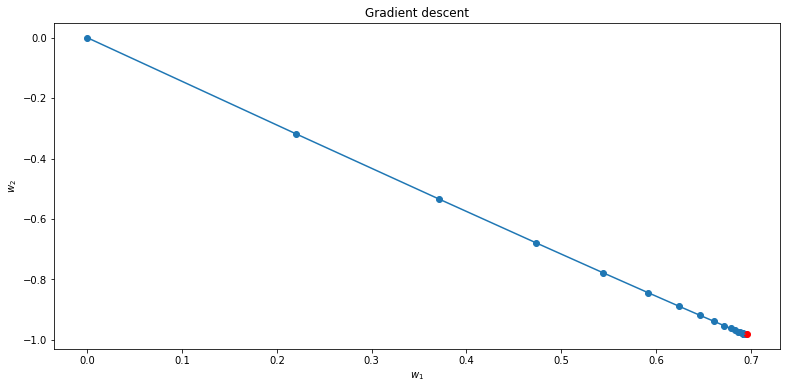

In [114]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(w_true[0], w_true[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

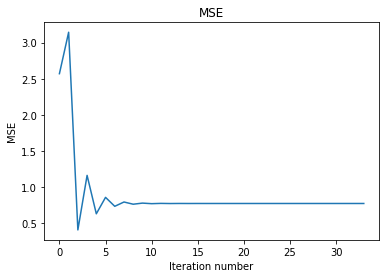

In [89]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

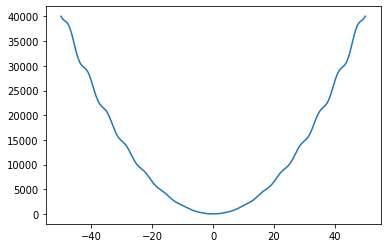

In [179]:
x = np.linspace(-50, 50, 5000)
l2_coef = 15
def func2(_x, _l2_coef): return (_x**2)*(np.sin(0.5*_x)**2+1) + _l2_coef * _x**2
plt.plot(x, func2(x, l2_coef))
plt.show()

In [180]:
def true_grad2(_x, _l2_coef): return _x*(2+2*np.sin(0.5*_x)**2+_x*np.sin(0.5*_x)*np.cos(0.5*_x)) + _l2_coef * 2 * _x  # Находим производную по фурмулам
print('true grad', true_grad2(x0, l2_coef))

true grad -554.5067568188659


In [181]:
#x0=np.random.uniform(-50, 50)
x0=-18
print(x0)
alpha=0.005
w_list=[]
for x in range(1000):
  if x%20==0:
    print(x0, func2(x0, l2_coef))
  w_list.append([x0, func2(x0, l2_coef)])
  x0-=alpha*true_grad2(x0, l2_coef)
w_list=np.array(w_list)

-18
-18 5239.028693264459
-0.5044803019635365 4.08785809269132
-0.015354889612711838 0.0037723760572078643
-0.000469710589719732 3.530048621686917e-06
-1.4368653465410713e-05 3.3033312385556047e-09
-4.395434291815669e-07 3.091174818187067e-12
-1.3445826820347344e-08 2.8926441421243516e-15
-4.1131375622974365e-10 2.7068640970211357e-18
-1.2582268708667675e-11 2.5330157737138832e-21
-3.848971337800092e-13 2.370332857473061e-24
-1.1774172609269712e-14 2.2180982501260343e-27
-3.6017711867948786e-16 2.075640909124126e-30
-1.1017976474892549e-17 1.9423328896205704e-33
-3.370447463357953e-19 1.8175865765209695e-36
-1.0310347030729928e-20 1.700852094305303e-39
-3.153980504065542e-22 1.591614883204085e-42
-9.6481650815213e-24 1.4893934310445905e-45
-2.951416133368479e-25 1.3937371507692386e-48
-9.028511762294848e-27 1.3042243942703427e-51
-2.7618614576340245e-28 1.2204605937862942e-54
-8.448655672156425e-30 1.1420765226665749e-57
-2.584480929315299e-31 1.0687266678391155e-60
-7.906040834410757e

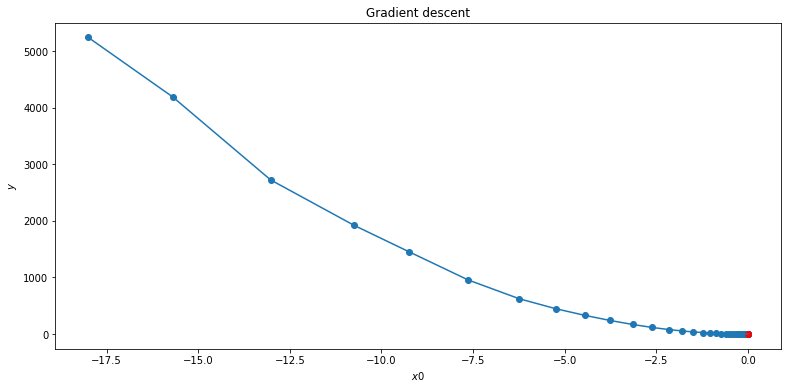

In [182]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$x0$')
plt.ylabel(r'$y$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(0, 0, c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Из того, что я заметил, играясь с коэффициентом L2-регуляризации: чем он больше, тем у меня получалась более гладкая функция в последнем примере.

**Задание 2:** Модифицировать пример со стохастическим градиентом из этого урока, реализовав в нём рассчёт градиента по десяти случайно выбираемым объектам (mini-batch градиент).

In [ ]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, 
                                              n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

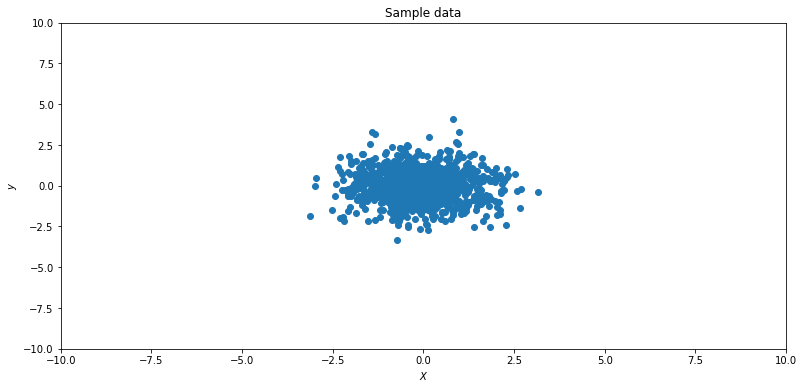

In [ ]:
plt.figure(figsize=(13, 6))
plt.title('Sample data')
plt.xlabel(r'$X$')
plt.ylabel(r'$y$')

plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-10, 10])
plt.ylim([-10, 10])

plt.show()

In [ ]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)  # array([-1.77323434e-17,  1.03805853e-17])
stds = np.std(data, axis=0)  # array([1., 1.])
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [ ]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [ ]:
# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# prepare batches
batch_size = 10

data_indices = np.arange(0, data.shape[0])
rng.shuffle(data_indices)
n_batches = data.shape[0] // batch_size
indices_splitted = np.array_split(data_indices, n_batches)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    #train_ind = rng.choice(data.shape[0], size=10, replace=False)
    train_ind = rng.choice(indices_splitted, size=1, replace=False)[0]
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    error=mserror(data, new_w, target)
    errors.append(error)
    if iter_num %2000==0:
        print(f'Iter_num: {iter_num}     Error: {error}     weights: {new_w}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования mini-batch градиентного спуска функционал ошибки составляет {round(min(errors), 4)} при весах {w_list[errors.index(min(errors))]}')

Iter_num: 0     Error: 8188.540298458312     weights: [0.00705431 0.0100657 ]
Iter_num: 2000     Error: 3837.6747921871065     weights: [19.32741484 21.62593691]
Iter_num: 4000     Error: 1756.8867313838593     weights: [33.17712305 36.64769592]
Iter_num: 6000     Error: 828.2384505452519     weights: [42.33330447 46.58922204]
Iter_num: 8000     Error: 399.457844842881     weights: [48.48400626 53.45177726]
Iter_num: 10000     Error: 202.40195297822453     weights: [52.76074589 58.04224327]
Iter_num: 12000     Error: 113.6454865283762     weights: [55.59945496 61.1189008 ]
Iter_num: 14000     Error: 72.71762806496997     weights: [57.50585694 63.24478798]
Iter_num: 16000     Error: 54.00132386983215     weights: [58.78116285 64.70499551]
Iter_num: 18000     Error: 45.70681180043749     weights: [59.62596547 65.65601727]
Iter_num: 20000     Error: 41.74754552741806     weights: [60.23043313 66.32232992]
Iter_num: 22000     Error: 40.04496436004542     weights: [60.60864752 66.75524568]


In [ ]:
print(w_list[errors.index(min(errors))])
print(coef)

[61.43617784 67.66502768]
[62.6735955 68.0472182]


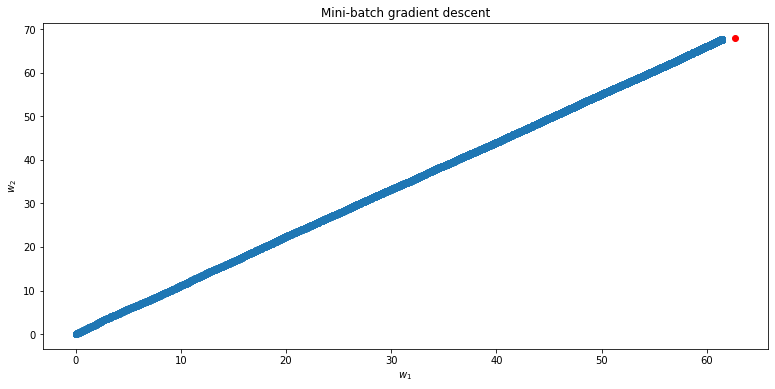

In [ ]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Mini-batch gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')

plt.show()

Text(0, 0.5, 'MSE')

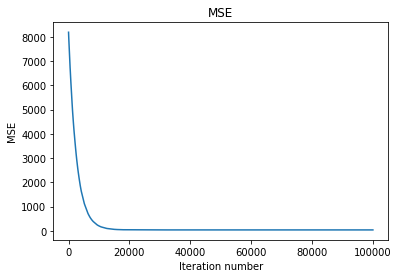

In [ ]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')